In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv('Uber Request Data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [5]:
df['Request hour'] = df['Request timestamp'].apply(lambda x: x.time().hour)

In [6]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [7]:
def find_time_zone(x):
    if x >= 4 and x < 8:
        return ("Early Morning")
    elif x >= 8 and x < 12:
        return ("Morning")
    elif x >= 12 and x < 16:
        return ("Afternoon")
    elif x >= 16 and x < 20:
        return ("Evening")
    elif x >= 20 and x < 24:
        return ("Night")
    else:
        return("Late Night")
df['Request time zone'] = df['Request hour'].apply(find_time_zone)

In [8]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request time zone
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


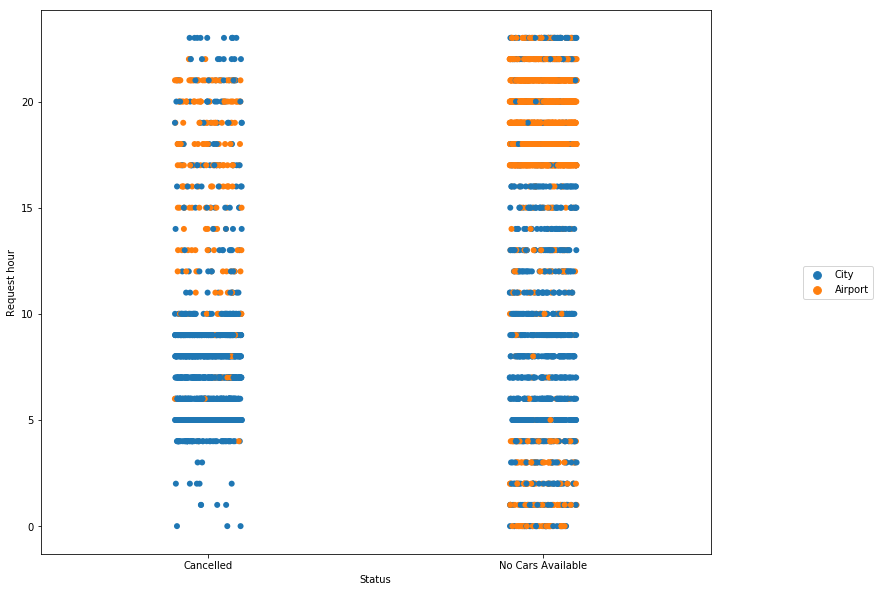

In [9]:
plt.figure(figsize=(12,10))
sns.stripplot(x='Status', y='Request hour', data=df[df['Status']!='Trip Completed'], hue='Pickup point', size = 6)
plt.legend(loc = 'center right', bbox_to_anchor = (1.25,0.5))

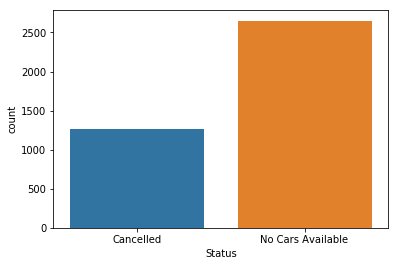

In [10]:
sns.countplot(x = 'Status', data=df[df['Status']!='Trip Completed'])

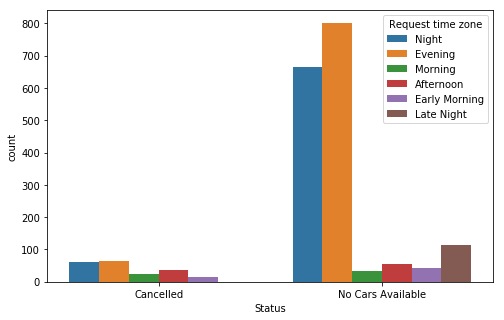

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Status', data=df[(df['Status']!='Trip Completed') & (df['Pickup point'] == 'Airport')], hue='Request time zone')

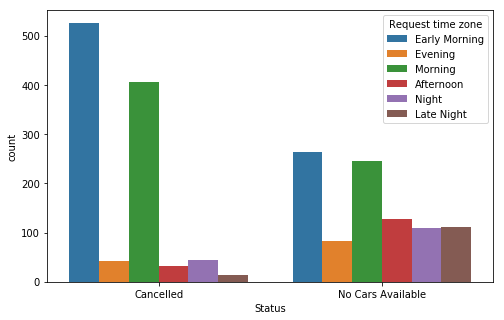

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Status', data=df[(df['Status']!='Trip Completed') & (df['Pickup point'] == 'City')], hue='Request time zone')

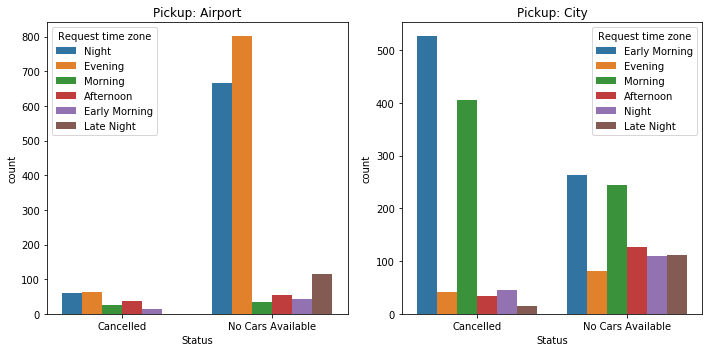

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Status', data=df[(df['Status']!='Trip Completed') & (df['Pickup point'] == 'Airport')], hue='Request time zone')
plt.title("Pickup: Airport")
plt.subplot(1,2,2)
sns.countplot(x = 'Status', data=df[(df['Status']!='Trip Completed') & (df['Pickup point'] == 'City')], hue='Request time zone')
plt.title("Pickup: City")
plt.tight_layout()

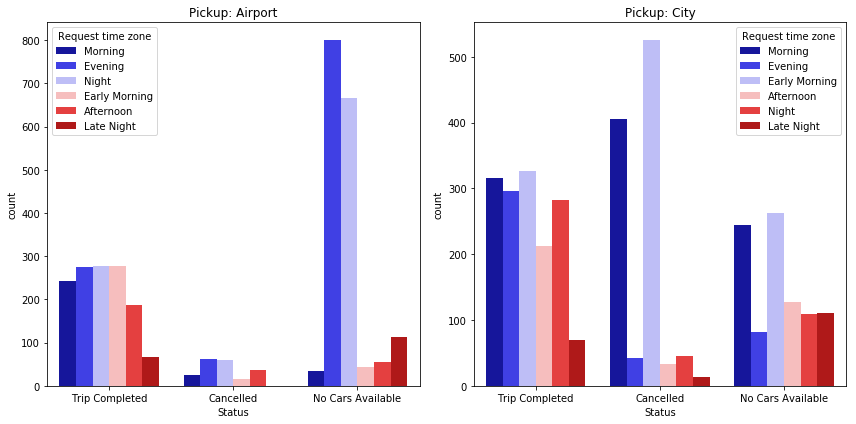

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Status', data=df[(df['Pickup point'] == 'Airport')], hue='Request time zone', palette = 'seismic')
plt.title("Pickup: Airport")
plt.subplot(1,2,2)
sns.countplot(x = 'Status', data=df[(df['Pickup point'] == 'City')], hue='Request time zone', palette='seismic')
plt.title("Pickup: City")
plt.tight_layout()

In [15]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request time zone
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [16]:
total_trips_morning = len(df[df['Request time zone'] == 'Morning'].index)
total_trips_early_morning = len(df[df['Request time zone'] == 'Early Morning'].index)
total_trips_afternoon = len(df[df['Request time zone'] == 'Afternoon'].index)
total_trips_evening = len(df[df['Request time zone'] == 'Evening'].index)
total_trips_night = len(df[df['Request time zone'] == 'Night'].index)
total_trips_late_night = len(df[df['Request time zone'] == 'Late Night'].index)
complete_trips_morning = len(df[(df['Request time zone'] == 'Morning') & (df['Status'] == 'Trip Completed')].index)
complete_trips_early_morning = len(df[(df['Request time zone'] == 'Early Morning') & (df['Status'] == 'Trip Completed')].index)
complete_trips_afternoon = len(df[(df['Request time zone'] == 'Afternoon') & (df['Status'] == 'Trip Completed')].index)
complete_trips_evening = len(df[(df['Request time zone'] == 'Evening') & (df['Status'] == 'Trip Completed')].index)
complete_trips_night = len(df[(df['Request time zone'] == 'Night') & (df['Status'] == 'Trip Completed')].index)
complete_trips_late_night = len(df[(df['Request time zone'] == 'Late Night') & (df['Status'] == 'Trip Completed')].index)

In [17]:
df3 = pd.DataFrame(columns='Trips Completed,Trips Requested'.split(','), index = 'Early Morning,Morning,Afternoon,Evening,Night,Late Night'.split(','))

In [18]:
df3

,Trips Completed,Trips Requested
Early Morning,NaN,NaN
Morning,NaN,NaN
Afternoon,NaN,NaN
Evening,NaN,NaN
Night,NaN,NaN
Late Night,NaN,NaN


In [19]:
df3.loc['Early Morning']['Trips Completed'] = complete_trips_early_morning
df3.loc['Morning']['Trips Completed'] = complete_trips_morning
df3.loc['Afternoon']['Trips Completed'] = complete_trips_afternoon
df3.loc['Night']['Trips Completed'] = complete_trips_night
df3.loc['Evening']['Trips Completed'] = complete_trips_evening
df3.loc['Late Night']['Trips Completed'] = complete_trips_late_night
df3.loc['Early Morning']['Trips Requested'] = total_trips_early_morning
df3.loc['Morning']['Trips Requested'] = total_trips_morning
df3.loc['Afternoon']['Trips Requested'] = total_trips_afternoon
df3.loc['Night']['Trips Requested'] = total_trips_night
df3.loc['Evening']['Trips Requested'] = total_trips_evening
df3.loc['Late Night']['Trips Requested'] = total_trips_late_night

In [20]:
df3

,Trips Completed,Trips Requested
Early Morning,604,1452
Morning,559,1268
Afternoon,400,651
Evening,572,1560
Night,560,1439
Late Night,136,375


In [21]:
df3['Slot Gap'] = df3['Trips Requested'] - df3['Trips Completed']

In [22]:
df3

,Trips Completed,Trips Requested,Slot Gap
Early Morning,604,1452,848
Morning,559,1268,709
Afternoon,400,651,251
Evening,572,1560,988
Night,560,1439,879
Late Night,136,375,239


In [23]:
df3.sort_values(by='Slot Gap', axis = 0)

,Trips Completed,Trips Requested,Slot Gap
Late Night,136,375,239
Afternoon,400,651,251
Morning,559,1268,709
Early Morning,604,1452,848
Night,560,1439,879
Evening,572,1560,988


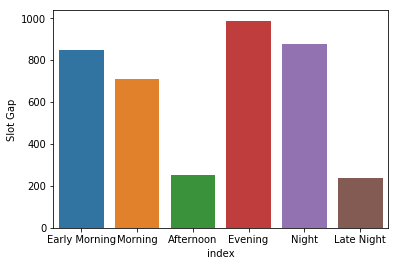

In [24]:
sns.barplot(x='index', y='Slot Gap', data=df3.reset_index())

In [25]:
airport_total_trips_evening = len(df[(df['Request time zone'] == 'Evening') & (df['Pickup point'] == 'Airport')].index)
airport_complete_trips_evening = len(df[(df['Request time zone'] == 'Evening') & (df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'Airport')].index)
city_total_trips_evening = len(df[(df['Request time zone'] == 'Evening') & (df['Pickup point'] == 'City')].index)
city_complete_trips_evening = len(df[(df['Request time zone'] == 'Evening') & (df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'City')].index)

In [26]:
info = [[airport_total_trips_evening,airport_complete_trips_evening],[city_total_trips_evening,city_complete_trips_evening]]
df4 = pd.DataFrame(data=info, columns='Trips Requested,Trips Completed'.split(','), index = ['Airport','City'])

In [27]:
df4['Slot Gap'] = df4['Trips Requested'] - df4['Trips Completed']

In [28]:
df4

,Trips Requested,Trips Completed,Slot Gap
Airport,1140,276,864
City,420,296,124


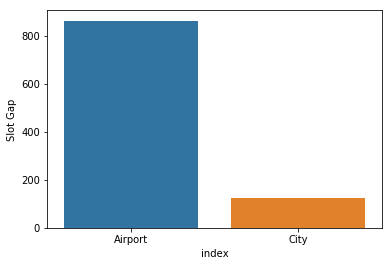

In [29]:
sns.barplot(data=df4.reset_index(), x='index', y='Slot Gap')

In [30]:
airport_total_trips_evening = len(df[(df['Request time zone'] == 'Night') & (df['Pickup point'] == 'Airport')].index)
airport_complete_trips_evening = len(df[(df['Request time zone'] == 'Night') & (df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'Airport')].index)
city_total_trips_evening = len(df[(df['Request time zone'] == 'Night') & (df['Pickup point'] == 'City')].index)
city_complete_trips_evening = len(df[(df['Request time zone'] == 'Night') & (df['Status'] == 'Trip Completed') & (df['Pickup point'] == 'City')].index)

In [31]:
info = [[airport_total_trips_evening,airport_complete_trips_evening],[city_total_trips_evening,city_complete_trips_evening]]
df4 = pd.DataFrame(data=info, columns='Trips Requested,Trips Completed'.split(','), index = ['Airport','City'])

In [32]:
df4['Slot Gap'] = df4['Trips Requested'] - df4['Trips Completed']

In [33]:
df4


,Trips Requested,Trips Completed,Slot Gap
Airport,1002,277,725
City,437,283,154


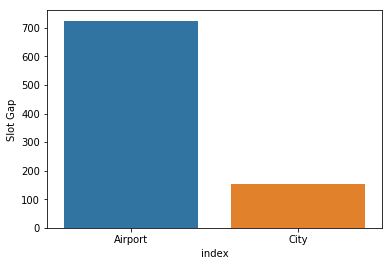

In [34]:
sns.barplot(data=df4.reset_index(), x='index', y='Slot Gap')